In [40]:
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df_160 = pd.read_csv('new_date_160.csv')
df_160

,date,unidad
0,2018-04-09 20:00:00,1
1,2018-04-10 20:00:00,1
2,2018-04-11 16:00:00,3
3,2018-04-11 19:00:00,63
4,2018-04-13 19:00:00,121
...,...,...
5350,2022-10-28 20:00:00,5
5351,2022-10-28 22:00:00,7
5352,2022-10-28 23:00:00,121
5353,2022-10-30 15:00:00,1


In [28]:
import pandas as pd


# Convert the date to datetime64
df_160['date'] = pd.to_datetime(df_160['date'], format='%Y-%m-%d')

# Filter data between two dates
df_160_2018 = df_160.loc[(df_160['date'] >= '2022-10-01')
                     & (df_160['date'] < '2022-11-01')]
# Display
df_160_2018

,date,unidad
5236,2022-10-03 16:00:00,62
5237,2022-10-03 20:00:00,5
5238,2022-10-03 22:00:00,81
5239,2022-10-03 23:00:00,87
5240,2022-10-04 00:00:00,2
...,...,...
5350,2022-10-28 20:00:00,5
5351,2022-10-28 22:00:00,7
5352,2022-10-28 23:00:00,121
5353,2022-10-30 15:00:00,1


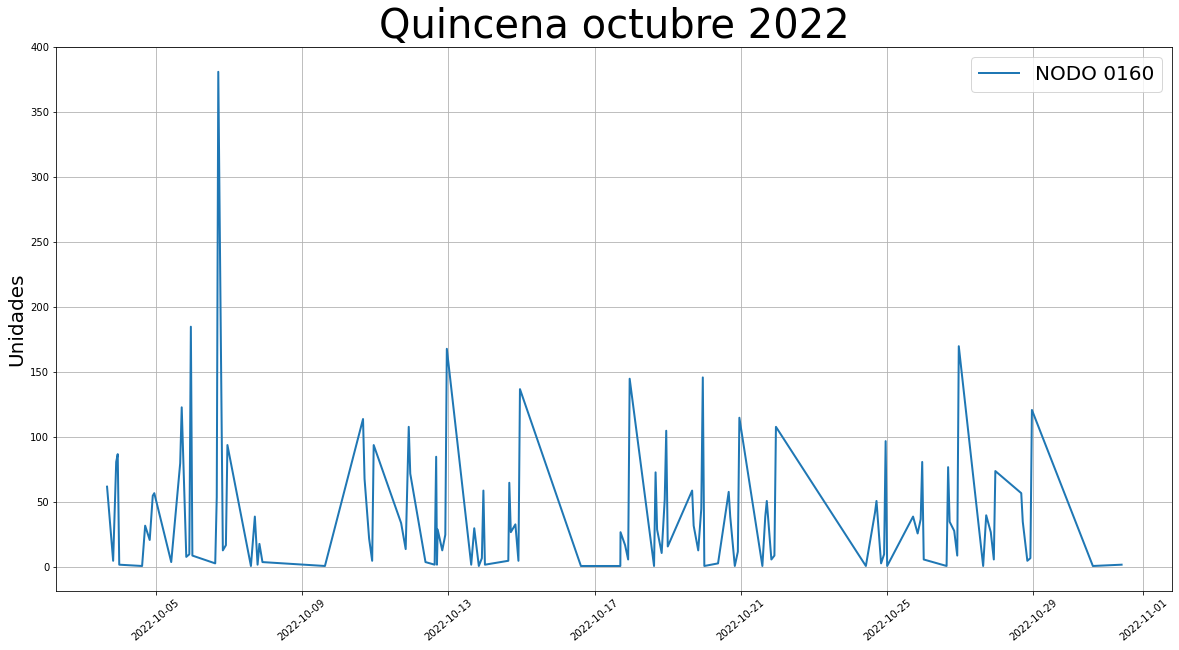

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

y1 = df_160_2018['unidad']
x1 = df_160_2018['date']


fig, ax = plt.subplots(figsize=(20,10))
plt.grid()
ax.plot(x1, y1, linewidth=2.0, label="NODO 0160")
ax.xaxis.set_tick_params(rotation=40)
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Quincena octubre 2022',fontsize = 40)
ax.legend(fontsize = 20)



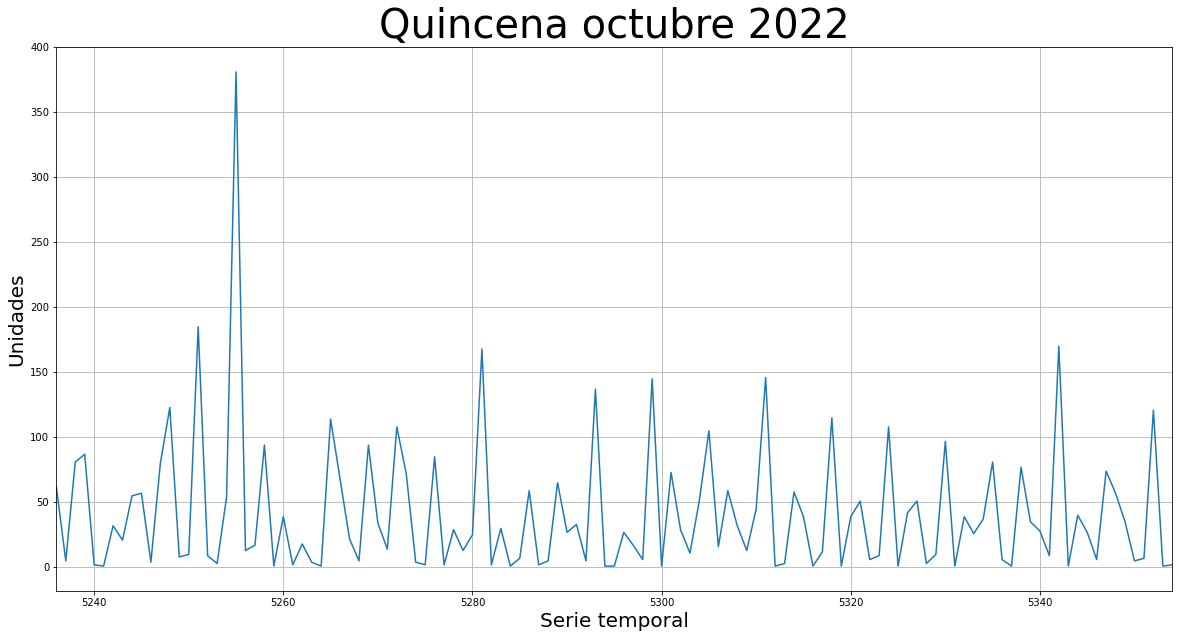

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

plt.xlabel('Serie temporal',fontsize = 20)
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Quincena octubre 2022',fontsize = 40)

plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df_160_2018['unidad'])

In [31]:
flight_data=df_160_2018
flight_data.columns


Index(['date', 'unidad'], dtype='object')

In [32]:
all_data = flight_data['unidad'].values.astype(float)


In [33]:
print(all_data)

[ 62.   5.  81.  87.   2.   1.  32.  21.  55.  57.   4.  80. 123.   8.
  10. 185.   9.   3.  54. 381.  13.  17.  94.   1.  39.   2.  18.   4.
   1. 114.  68.  22.   5.  94.  34.  14. 108.  72.   4.   2.  85.   2.
  29.  13.  25. 168.   2.  30.   1.   7.  59.   2.   5.  65.  27.  33.
   5. 137.   1.   1.  27.  17.   6. 145.   1.  73.  29.  11.  52. 105.
  16.  59.  32.  13.  45. 146.   1.   3.  58.  39.   1.  12. 115.   1.
  39.  51.   6.   9. 108.   1.  42.  51.   3.  10.  97.   1.  39.  26.
  37.  81.   6.   1.  77.  35.  28.   9. 170.   1.  40.  27.   6.  74.
  57.  35.   5.   7. 121.   1.   2.]


In [126]:
test_data_size = 20

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]


In [127]:
print(len(train_data))
print(len(test_data))

99
20


In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))


In [129]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])


[[-0.67894737]
 [-0.97894737]
 [-0.57894737]
 [-0.54736842]
 [-0.99473684]]
[[-0.49473684]
 [-1.        ]
 [-0.8       ]
 [-0.86842105]
 [-0.81052632]]


In [130]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
train_data_normalized

tensor([-0.6789, -0.9789, -0.5789, -0.5474, -0.9947, -1.0000, -0.8368, -0.8947,
        -0.7158, -0.7053, -0.9842, -0.5842, -0.3579, -0.9632, -0.9526, -0.0316,
        -0.9579, -0.9895, -0.7211,  1.0000, -0.9368, -0.9158, -0.5105, -1.0000,
        -0.8000, -0.9947, -0.9105, -0.9842, -1.0000, -0.4053, -0.6474, -0.8895,
        -0.9789, -0.5105, -0.8263, -0.9316, -0.4368, -0.6263, -0.9842, -0.9947,
        -0.5579, -0.9947, -0.8526, -0.9368, -0.8737, -0.1211, -0.9947, -0.8474,
        -1.0000, -0.9684, -0.6947, -0.9947, -0.9789, -0.6632, -0.8632, -0.8316,
        -0.9789, -0.2842, -1.0000, -1.0000, -0.8632, -0.9158, -0.9737, -0.2421,
        -1.0000, -0.6211, -0.8526, -0.9474, -0.7316, -0.4526, -0.9211, -0.6947,
        -0.8368, -0.9368, -0.7684, -0.2368, -1.0000, -0.9895, -0.7000, -0.8000,
        -1.0000, -0.9421, -0.4000, -1.0000, -0.8000, -0.7368, -0.9737, -0.9579,
        -0.4368, -1.0000, -0.7842, -0.7368, -0.9895, -0.9526, -0.4947, -1.0000,
        -0.8000, -0.8684, -0.8105])

In [131]:
train_window = 20


In [133]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq


In [134]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)


In [135]:
train_inout_seq[:5]


[(tensor([-0.6789, -0.9789, -0.5789, -0.5474, -0.9947, -1.0000, -0.8368, -0.8947,
          -0.7158, -0.7053, -0.9842, -0.5842, -0.3579, -0.9632, -0.9526, -0.0316,
          -0.9579, -0.9895, -0.7211,  1.0000]),
  tensor([-0.9368])),
 (tensor([-0.9789, -0.5789, -0.5474, -0.9947, -1.0000, -0.8368, -0.8947, -0.7158,
          -0.7053, -0.9842, -0.5842, -0.3579, -0.9632, -0.9526, -0.0316, -0.9579,
          -0.9895, -0.7211,  1.0000, -0.9368]),
  tensor([-0.9158])),
 (tensor([-0.5789, -0.5474, -0.9947, -1.0000, -0.8368, -0.8947, -0.7158, -0.7053,
          -0.9842, -0.5842, -0.3579, -0.9632, -0.9526, -0.0316, -0.9579, -0.9895,
          -0.7211,  1.0000, -0.9368, -0.9158]),
  tensor([-0.5105])),
 (tensor([-0.5474, -0.9947, -1.0000, -0.8368, -0.8947, -0.7158, -0.7053, -0.9842,
          -0.5842, -0.3579, -0.9632, -0.9526, -0.0316, -0.9579, -0.9895, -0.7211,
           1.0000, -0.9368, -0.9158, -0.5105]),
  tensor([-1.])),
 (tensor([-0.9947, -1.0000, -0.8368, -0.8947, -0.7158, -0.7053, -0.9

In [136]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size)) # (num_layers * num_directions, batch_size, hidden_size)

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]


In [137]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [138]:
print(model)


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [139]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')


epoch:   1 loss: 0.00071848
epoch:  26 loss: 0.00086372
epoch:  51 loss: 0.00164393
epoch:  76 loss: 0.01762311
epoch: 101 loss: 0.00498089
epoch: 126 loss: 0.00579223
epoch: 149 loss: 0.0023847038


In [140]:
fut_pred = 20

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)


[-0.800000011920929, -1.0, -0.942105233669281, -0.4000000059604645, -1.0, -0.800000011920929, -0.7368420958518982, -0.9736841917037964, -0.9578947424888611, -0.4368421137332916, -1.0, -0.7842105031013489, -0.7368420958518982, -0.9894737005233765, -0.9526315927505493, -0.49473685026168823, -1.0, -0.800000011920929, -0.8684210777282715, -0.8105263113975525]


In [141]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())


In [142]:
test_inputs[fut_pred:]


[-0.6390560269355774,
 -0.5566812753677368,
 -0.7832701206207275,
 -0.9971320629119873,
 -0.48883020877838135,
 -0.761381983757019,
 -0.9211969375610352,
 -1.016788363456726,
 -0.7034417986869812,
 -0.8368568420410156,
 -0.9032104015350342,
 -1.0224614143371582,
 -0.9093449711799622,
 -0.5415565967559814,
 -0.7822750210762024,
 -0.8327614068984985,
 -0.7670636177062988,
 -0.6459322571754456,
 -0.7588924169540405,
 -0.8514672517776489]

In [143]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)


[[69.57935488]
 [85.23055768]
 [42.17867708]
 [ 1.54490805]
 [98.12226033]
 [46.33742309]
 [15.97258186]
 [-2.18978906]
 [57.34605825]
 [31.99720001]
 [19.39002371]
 [-3.26766872]
 [18.22445548]
 [88.10424662]
 [42.367746  ]
 [32.77533269]
 [45.25791264]
 [68.27287114]
 [46.81044078]
 [29.22122216]]


In [144]:
x = np.arange(99, 119, 1)
print(x)


[ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118]


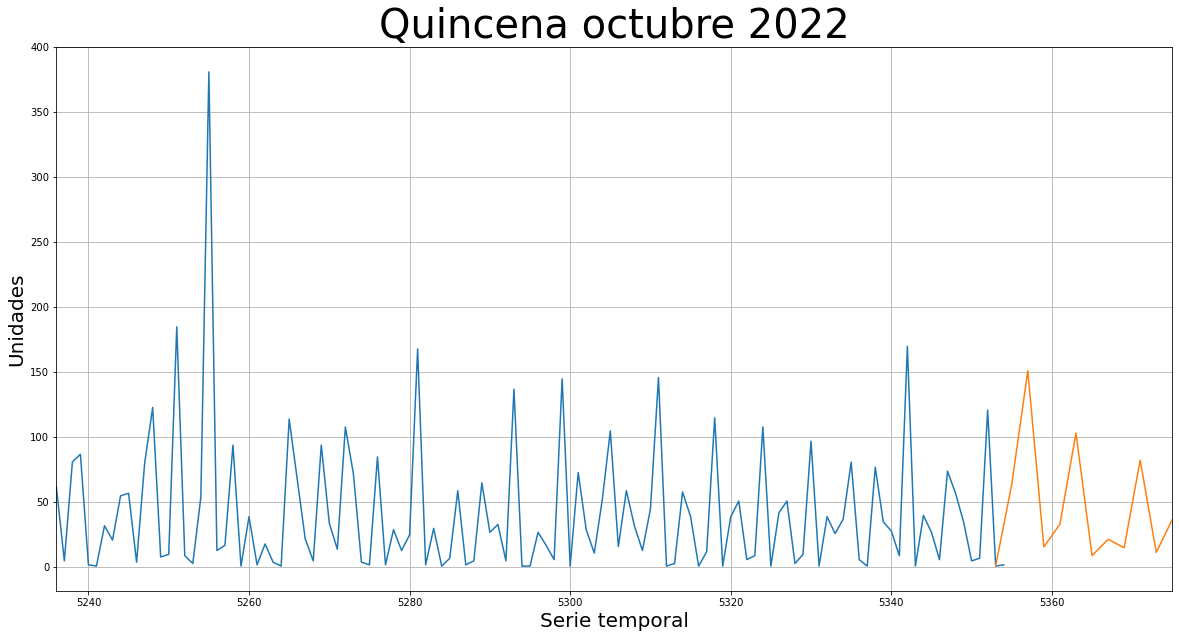

In [106]:
fig, ax = plt.subplots(figsize=(20,10))


plt.xlabel('Serie temporal',fontsize = 20)
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Quincena octubre 2022',fontsize = 40)
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df_160_2018['unidad'])
plt.plot(x,actual_predictions)
plt.show()

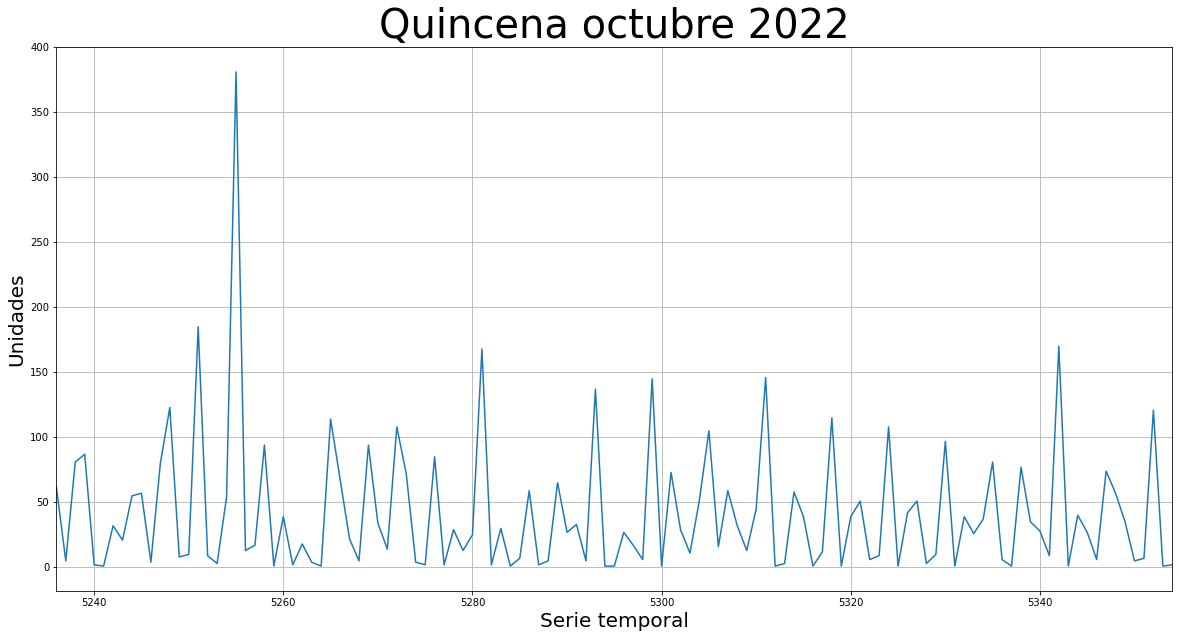

In [67]:
fig, ax = plt.subplots(figsize=(20,10))

plt.xlabel('Serie temporal',fontsize = 20)
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Quincena octubre 2022',fontsize = 40)

plt.grid(True)
plt.autoscale(axis='x',tight=True)

plt.plot(df_160_2018['unidad'])

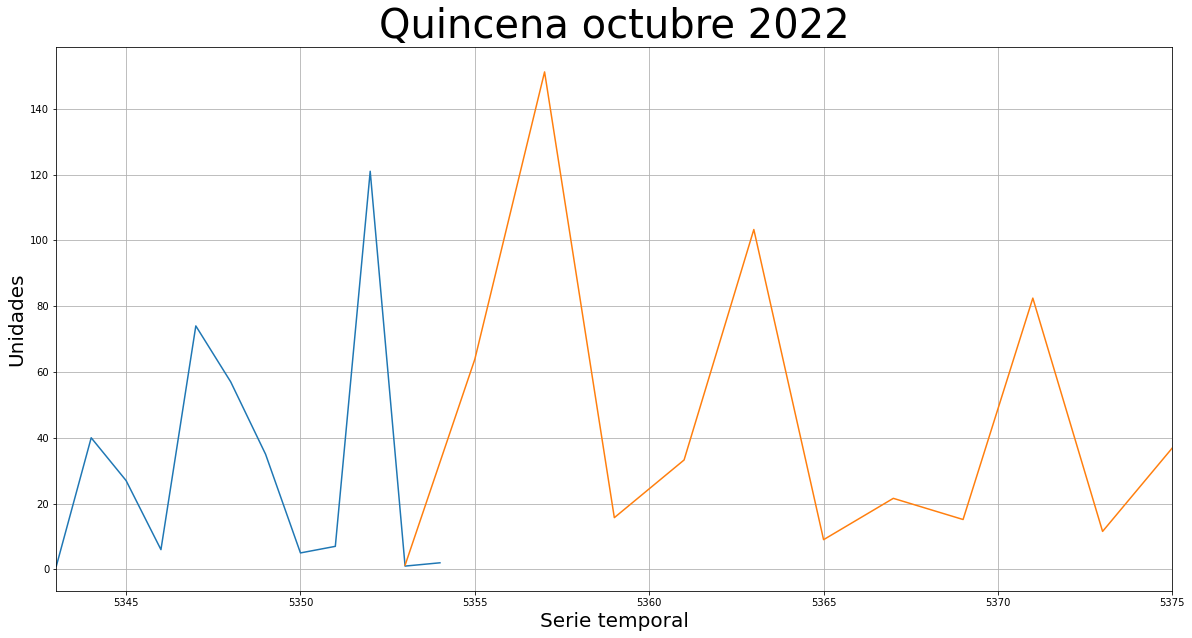

In [110]:



fig, ax = plt.subplots(figsize=(20,10))
plt.xlabel('Serie temporal',fontsize = 20)
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Quincena octubre 2022',fontsize = 40)
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df_160_2018['unidad'][-train_window:])
plt.plot(x,actual_predictions)
